In [94]:
import numpy as np
import matplotlib.pyplot as plt
import gudhi as gd

In [95]:
plt.style.use("ggplot")

In [96]:
# Randomly sample points from a circle with radius 1
# which shifts right by delta after every k samples

def sample(size, k, delta):
    assert size >= k

    center = np.array([0, 0])
    radius = 1
    theta = 2 * np.pi * np.random.random(size)
    sample = np.column_stack((np.cos(theta), np.sin(theta)))
    
    shift = np.zeros(size)
    shift[k::k] = delta
    shift = np.cumsum(shift)
    shift = np.column_stack((shift, np.zeros(size)))

    sample += shift
    return sample

In [97]:
size = 1000
k = 100
delta = 0.5

In [98]:
ts = sample(size, k, delta)

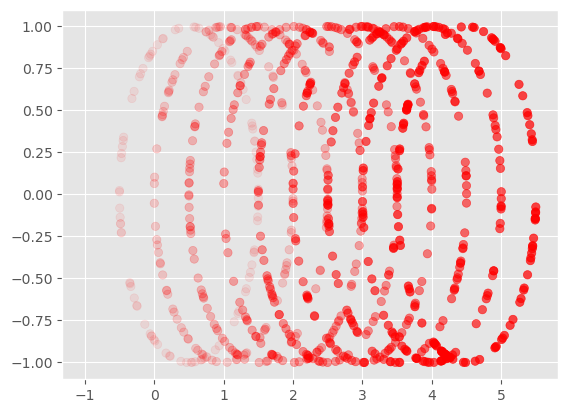

In [99]:
alpha_values = np.repeat(np.arange(0, size // k) * 0.08, k)[:size]
plt.scatter(ts[:, 0], ts[:, 1], alpha=alpha_values, color='red')

Expect to see a single H_0 and H_1 bars persisting across time

In [100]:
rips_complex = gd.RipsComplex(points=ts, max_edge_length=1)

In [101]:
# Use dimension of embedded space rather than manifold 
st = rips_complex.create_simplex_tree(max_dimension=2)

In [102]:
# Returns list of indices
filtration = [sigma for sigma, _ in st.get_filtration()]

In [103]:
from gtda.time_series import SlidingWindow

In [104]:
window_size = 50

SW = SlidingWindow(size=window_size)

ts_window = SW.fit_transform(ts)

In [105]:
# Each window is of length 50 so a simplex appears in a window
# when (because the indices returned by create_simplex_tree are # sorted) sigma[-1] - sigma[0] <= 50. 
# First window of appearance will have sigma[-1] as the last 
# element, so window_index = sigma[-1] - 49
# Last window will be when sigma[0] is first element,
# therefore the sigma[0] - th window. 
# So we will set 

In [106]:
# Filtration based on if simplex observed in sliding window
appearances = [sigma for sigma in filtration if sigma[-1] - sigma[0] <= window_size]
times = [[max(0, sigma[-1] - window_size + 1), sigma[0] + 1] for sigma in appearances]

In [107]:
import dionysus as d

In [108]:
f = d.Filtration(appearances)

In [109]:
# d.is_simplicial(f)

In [111]:
zz, dgms, cells = d.zigzag_homology_persistence(f, times)

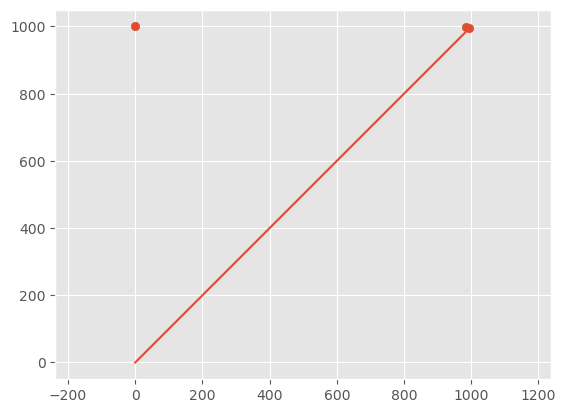

In [113]:
# So identifies the single connected component which stays throughout
d.plot.plot_diagram(dgms[0])

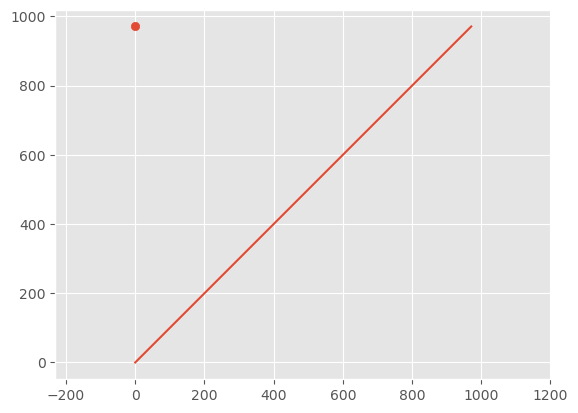

In [114]:
# I tried this without using 2-simplices and got much worse results:
# a diagonal block parallel to the diagonal 
# I've also repeated this a few times and noticed that the main component 
# breaks up sometimes - need a methodology that is resistent to noise...
# maybe average over landscapes?
d.plot.plot_diagram(dgms[1])

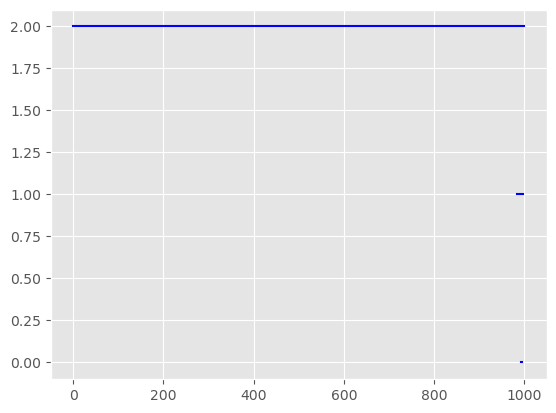

In [115]:
# Why do these bars appear at the end? I have re-run experiment multiple times # and this still happens
d.plot.plot_bars(dgms[0])

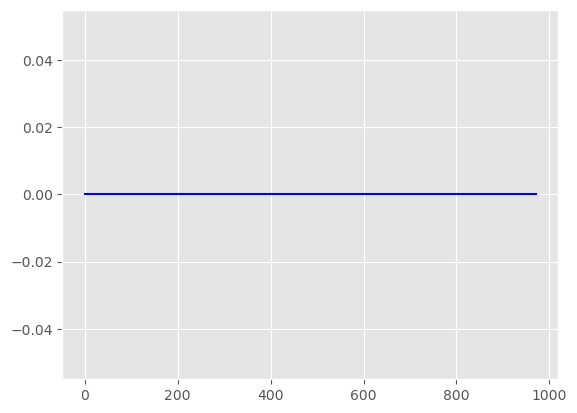

In [116]:
d.plot.plot_bars(dgms[1])